# Introduction to Q-Q Plot

Quantile-Quantile (Q-Q) plots are powerful tools in statistical analysis for comparing the distribution of observed data to a theoretical distribution. The Q-Q plot visually represents how closely the quantiles of the observed data align with the quantiles of the theoretical distribution. The mathematical formulation and algorithmic steps are outlined below:

## Algorithm Steps:

### 1. Sort the Data:
   - Let $x_1, x_2, \ldots, x_n $ be the ordered observations from the dataset.

### 2. Calculate Theoretical Quantiles:
   - Let $F(x) $ represent the cumulative distribution function (CDF) of the theoretical distribution.
   - The theoretical quantiles $q_i $ corresponding to the ordered data points are given by $q_i = F^{-1}\left(\frac{i - 0.5}{n}\right) $, for $i \in 1 \ldots N$, where $F^{-1} $ is the inverse of the CDF.

### 3. Plot the Points:
   - Construct a scatter plot with the x-axis representing the theoretical quantiles $q_i $ and the y-axis representing the observed quantiles $x_i $.

### 4. Draw a Reference Line:
- Include a reference line on the plot, typically a line passing through the 25th and 75th quantiles, indicating expected alignment between observed and theoretical quantiles under the assumption of a perfectly normal distribution.

### 5. Assess Deviations:
   - Deviations from the reference line provide visual cues regarding differences between the observed and theoretical quantiles.

### 6. Interpretation:
   - Analyze the patterns in the Q-Q plot. Points close to the reference line suggest a good match, while systematic deviations may indicate discrepancies in distribution.


In [201]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import rankdata
from functools import reduce


def qq_plot(ax, data, title=''):
    n = len(data)

    # Compute empirical quantiles
    sorted_data = np.sort(data)

    q = (rankdata(sorted_data) - 0.5) / n


    # Compute theoretical quantiles
    theoretical_quantiles =  stats.norm.ppf(q, loc=np.mean(data), scale=np.std(data, ddof=1))

    # Plot Q-Q plot
    ax.scatter(theoretical_quantiles, sorted_data, edgecolors='k', facecolors='none')


    y1, y2 =  np.quantile(sorted_data, [0.25, 0.75])
    x1, x2 = stats.norm.ppf([0.25, 0.75], loc=np.mean(data), scale=np.std(data, ddof=1))

    k = (y2-y1)/(x2-x1)
    b = y1 - k*x1
    ax.plot(theoretical_quantiles, k*theoretical_quantiles+b, c='r')

    ax.set_title(f'Q-Q Plot {title}', fontsize=10)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.grid(True)


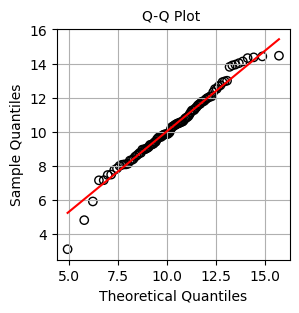

In [202]:
# Generate data from a normal distribution
d = stats.norm(loc=10, scale=2)
data = d.rvs(size=100)

fig, ax = plt.subplots(1, figsize=(3, 3))
qq_plot(ax, data)
plt.show()

In [219]:
def hist_plot(ax, data, title):
    mu = np.mean(data)
    std = np.std(data, ddof=1)
    norm = stats.norm(loc=mu, scale=std)
    x = np.linspace(mu -3*std, mu+3*std, 1000)
    norm_y = norm.pdf(x)
    ax.grid(True)
    ax.hist(data, bins=50, density=True, color='grey', edgecolor='black')
    ax.plot(x, norm_y, color='r')
    ax.set_title(f'{title}', fontsize=10)
    ax.set_xlabel('Quantiles')
    ax.set_ylabel('PDF')
    ax.set_xlim(mu -4*std, mu+4*std,)

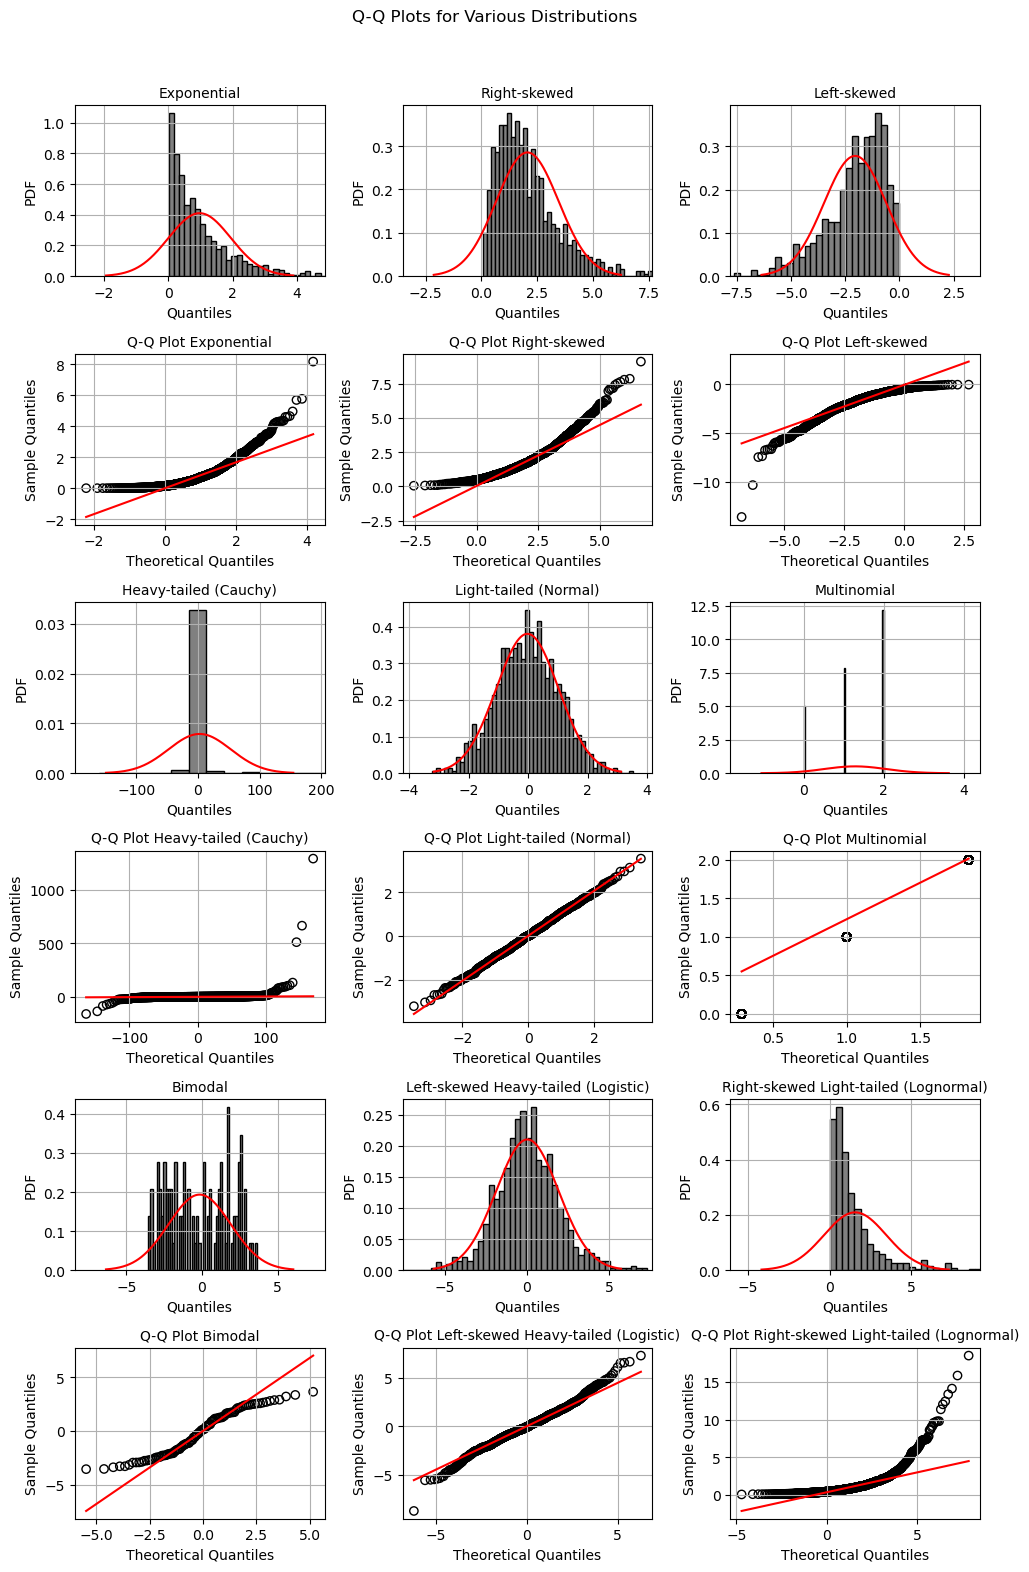

In [220]:
# Generate random data for different distributions
np.random.seed(42)

# Exponential distribution
exp_data = np.random.exponential(scale=1, size=1000)

# Right-skewed distribution
right_skewed_data = np.random.gamma(shape=2, scale=1, size=1000)

# Left-skewed distribution
left_skewed_data = -np.random.gamma(shape=2, scale=1, size=1000)

# Heavy-tailed distribution (Cauchy)
heavy_tailed_data = np.random.standard_cauchy(size=1000)

# Light-tailed distribution (Normal)
light_tailed_data = np.random.normal(loc=0, scale=1, size=1000)

# Multinomial distribution
multinomial_data = np.random.multinomial(n=1, pvals=[0.2, 0.3, 0.5], size=1000)
multinomial_data = np.argmax(multinomial_data, axis=1)

# Bimodal distribution
bimodal_data = np.concatenate([np.random.normal(loc=-2, scale=1, size=50),
                               np.random.normal(loc=2, scale=1, size=50)])

# Left-skewed heavy-tailed distribution (Logistic)
logistic_data = np.random.logistic(loc=0, scale=1, size=1000)

# Right-skewed light-tailed distribution (Lognormal)
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Plotting
fig, axes = plt.subplots(6, 3, figsize=(10, 16))
fig.suptitle('Q-Q Plots for Various Distributions', fontsize=12)

hist_plot(axes[0, 0], exp_data, 'Exponential')
hist_plot(axes[0, 1], right_skewed_data, 'Right-skewed')
hist_plot(axes[0, 2], left_skewed_data, 'Left-skewed')

qq_plot(axes[1, 0], exp_data, 'Exponential')
qq_plot(axes[1, 1], right_skewed_data, 'Right-skewed')
qq_plot(axes[1, 2], left_skewed_data, 'Left-skewed')

hist_plot(axes[2, 0], heavy_tailed_data, 'Heavy-tailed (Cauchy)')
hist_plot(axes[2, 1], light_tailed_data, 'Light-tailed (Normal)')
hist_plot(axes[2, 2], multinomial_data, 'Multinomial')

qq_plot(axes[3, 0], heavy_tailed_data, 'Heavy-tailed (Cauchy)')
qq_plot(axes[3, 1], light_tailed_data, 'Light-tailed (Normal)')
qq_plot(axes[3, 2], multinomial_data, 'Multinomial')

hist_plot(axes[4, 0], bimodal_data, 'Bimodal')
hist_plot(axes[4, 1], logistic_data, 'Left-skewed Heavy-tailed (Logistic)')
hist_plot(axes[4, 2], lognormal_data, 'Right-skewed Light-tailed (Lognormal)')

qq_plot(axes[5, 0], bimodal_data, 'Bimodal')
qq_plot(axes[5, 1], logistic_data, 'Left-skewed Heavy-tailed (Logistic)')
qq_plot(axes[5, 2], lognormal_data, 'Right-skewed Light-tailed (Lognormal)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


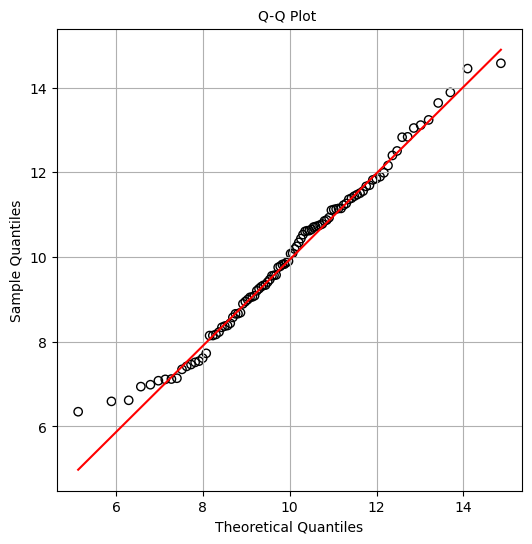

In [2]:
from mystats.plots.qqplot import qq_plot
from scipy import stats

# Generate data from a normal distribution
d = stats.norm(loc=10, scale=2)
data = d.rvs(size=100)

qq_plot(data)